In [486]:
#!pip install PyPDF2

In [487]:
import PyPDF2
import re

In [488]:
with open("/Users/rajeshprabhakarkaila/Downloads/RIL_IAR_2024.pdf",'rb') as file:
    reader=PyPDF2.PdfReader(file)
    text=""
    for page_num in range(len(reader.pages)):
        page=reader.pages[page_num]
        text+=page.extract_text()

In [489]:
text=re.sub(r'[^a-zA-Z0-9.,]',' ',text) # remove all non alphabet and digit characters

In [490]:
text=re.sub('[0-9]+','',text)

In [491]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

In [492]:
en_stopwords=set(stopwords.words("english"))

In [493]:
sentences=sent_tokenize(text)

In [494]:
import pandas as pd

In [495]:
sentences=pd.DataFrame(sentences,columns=['sentence'])

In [496]:
pd.set_option("display.max_colwidth",None)
sentences.head(2)

,sentence
0,Reliance for ENTERTAINMENT DIGITAL SERVICES SPORTSRETAIL EDUCATION EMPOWERMENT MATERIALS ENERGY Integrated Annual Report Our dreams have to be bigger.
1,Our ambitions higher.


In [497]:
text_words=word_tokenize(text)

In [498]:
import string
text_words_filter=[w for w in text_words if w.lower() not in en_stopwords and w not in
                  string.punctuation]

In [499]:
text_words_filter=[w for w in text_words_filter if len(w)>2]

In [500]:
from nltk.probability import FreqDist

In [501]:
text_words_filter=[w for w in text_words_filter if w.lower() not in ['limited','company',
                                                                    'yes','inr','din']]

In [502]:
freq=FreqDist(text_words_filter)

In [503]:
freq.most_common(20)

[('Reliance', 1350),
 ('India', 817),
 ('Private', 769),
 ('crore', 676),
 ('year', 542),
 ('Financial', 517),
 ('March', 513),
 ('Jio', 321),
 ('Report', 317),
 ('financial', 314),
 ('Total', 311),
 ('Infra', 282),
 ('Statements', 262),
 ('Board', 260),
 ('Industries', 257),
 ('Assets', 256),
 ('Current', 220),
 ('Year', 218),
 ('Non', 214),
 ('Management', 212)]

In [504]:
from wordcloud import WordCloud

In [505]:
wordcloud=WordCloud(width=1000,height=500,stopwords=en_stopwords,
                    colormap="plasma",collocations=False,max_words=700
                   ).generate(str(text_words_filter))

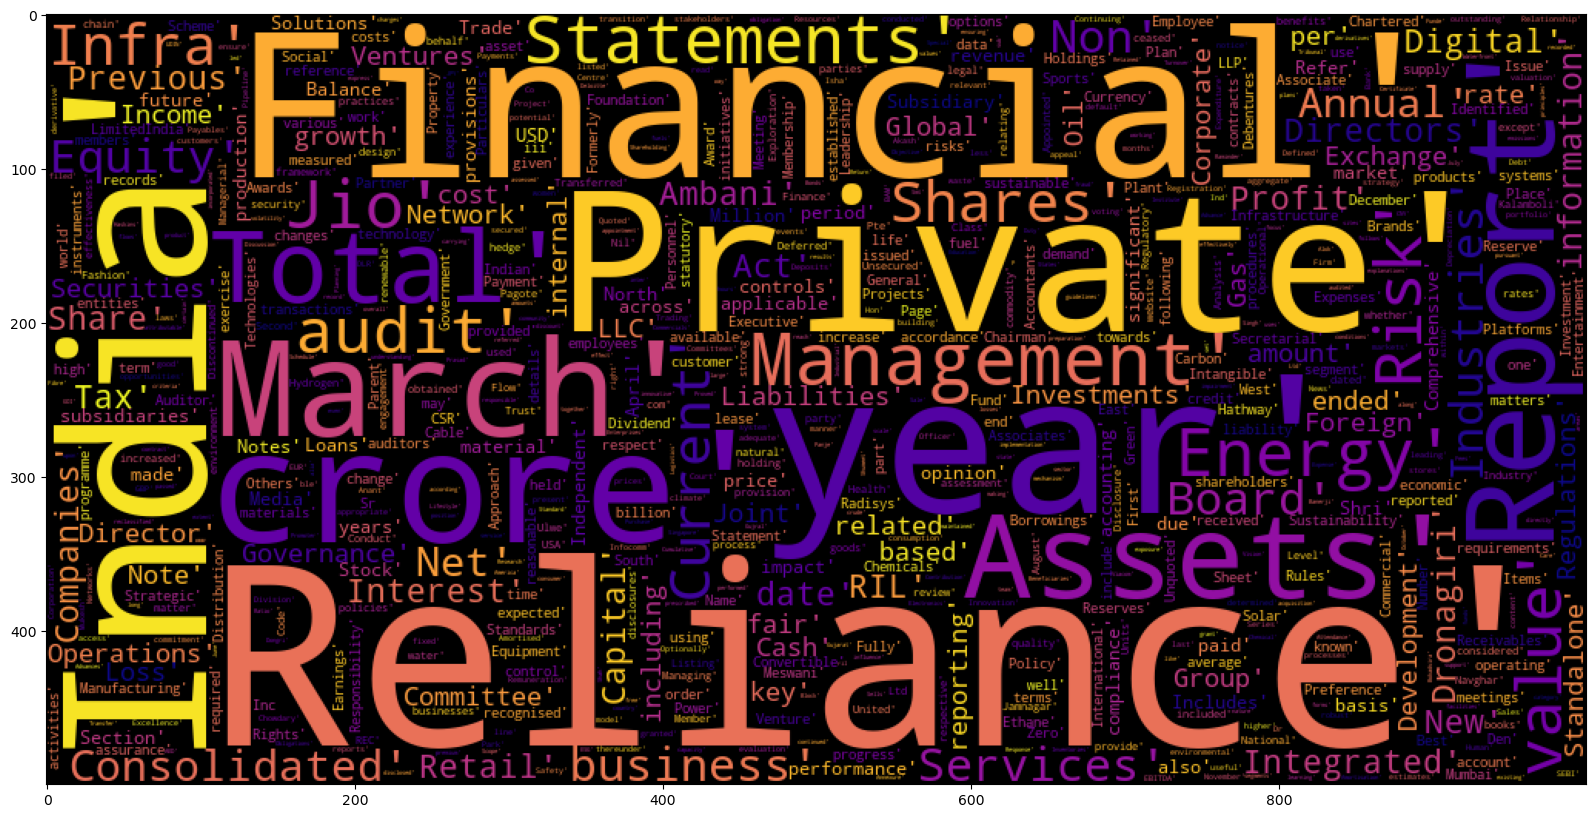

In [506]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.show()

In [507]:
stemmer=PorterStemmer()
words=['sustainability', 'sustainable', 'environment', 'climate', 'carbon', 
    'renewable', 'green energy', 'recycling', 'biodiversity', 'emissions',
    'conservation', 'eco-friendly', 'solar', 'wind', 'energy', 'water', 'conservation']

#Stem each word
stems=[stemmer.stem(word) for word in words]

print(stems)

['sustain', 'sustain', 'environ', 'climat', 'carbon', 'renew', 'green energi', 'recycl', 'biodivers', 'emiss', 'conserv', 'eco-friendli', 'solar', 'wind', 'energi', 'water', 'conserv']


In [508]:
import re

# Function to find sentences containing sustainability keywords
def find_sustainability_sentences_with_stems(text, stems):
    # Split text into sentences using regex for sentence boundaries
    sentences = re.split(r'(?<=[.!?]) +', text)
    
    # Filter sentences that contain any stemmed keyword
    relevant_sentences = []
    for sentence in sentences:
        # Extract words from the sentence
        sentence_words = re.findall(r'\b\w+\b', sentence)
        # Stem each word in the sentence
        stemmed_sentence_words = [stemmer.stem(word.lower()) for word in sentence_words]
        
        # Check if any stemmed keyword is in the sentence
        if any(stem in stemmed_sentence_words for stem in stems):
            relevant_sentences.append(sentence)
    
    return relevant_sentences

In [509]:
sustainability_sentences = find_sustainability_sentences_with_stems(text, stems)

for sentence in sustainability_sentences:
    print(sentence)

Reliance for ENTERTAINMENT DIGITAL SERVICES  SPORTSRETAIL EDUCATION EMPOWERMENT MATERIALS ENERGY Integrated Annual Report    Our dreams have to be bigger.
In preparation for the Report,  GRI Standards, National Guidelines for  Responsible Business Conduct  NGRBC ,  United Nations Sustainable Development  Goals  UN SDGs  and  other frameworks  were referenced.
The consolidated revenue crossed  ,, Crore MilestoneTable of Contents Reporting Suite   RIL s Annual Reporting suite brings together the  financial, non financial, risk, and sustainability  performance for the year.Corporate Overview Reliance at a Glance   Stakeholder Value Creation  Chairman and Managing Director s Statement  Now is the time for all of us in business community  to work together as a grand coalition and transform  India into a fully developed nation by     a prosperous India in which no Indian and no region  will be left behind.
Ambani Chairman and Managing Director Value Creation Model  Management Discussion and 

In [510]:
len(sentence)

1253

In [538]:
sustain_words=word_tokenize(sentence)

In [540]:
import string
sustain_words_filter=[w for w in sustain_words if w.lower() not in en_stopwords and w not in
                  string.punctuation]

In [542]:
sustain_words_filter=[w for w in sustain_words_filter if len(w)>2]

In [544]:
sustain_freq=FreqDist(sustain_words_filter)

In [548]:
wordcloud=WordCloud(width=1000,height=500,stopwords=en_stopwords,
                    colormap="plasma",collocations=False,max_words=700
                   ).generate(str(sustain_words_filter))

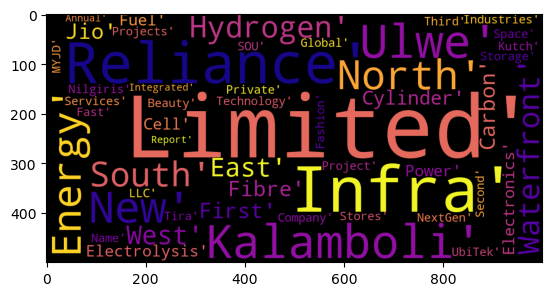

In [550]:
plt.imshow(wordcloud)
plt.show()